In [23]:
pip install nolds

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 225.1/225.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install hurst

Note: you may need to restart the kernel to use updated packages.


In [86]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("witn_new_rat_ag_num_cat_catnum.xlsx")

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ _ro_type (–∏—Å–∫–ª—é—á–∞–µ–º —Å—Ç—Ä–æ–∫–∏, –Ω–∞—á–∏–Ω–∞—é—â–∏–µ—Å—è –Ω–∞ "T")
df_cur = df.loc[~df["_ro_type"].str.startswith("T", na=False)]
print(len(df_cur))
# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –ø–æ –Ω—É–∂–Ω—ã–º –∫–æ–ª–æ–Ω–∫–∞–º
columns_needed = ["rating_numeric_cat", "_date", "identifier", "_ro_type", "agency"]
df_filtered = df_cur[columns_needed].copy()

# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫–∏ "–≥–æ–¥" –∏ "–ø–æ–ª—É–≥–æ–¥–∏–µ"
df_filtered["_year"] = df_filtered["_date"].dt.year
df_filtered["_half"] = df_filtered["_date"].dt.month.apply(lambda x: "H1" if x <= 6 else "H2")
df_filtered["_half_year"] = df_filtered["_year"].astype(str) + "-" + df_filtered["_half"]

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–æ–º–ø–∞–Ω–∏–∏ –∏ –¥–∞—Ç–µ
df_filtered = df_filtered.sort_values(by=["identifier", "_date"])

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö —Ä–µ–π—Ç–∏–Ω–≥–æ–≤
def fill_missing_ratings(df):
    df["rating_numeric_cat"] = df["rating_numeric_cat"].ffill()  # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–º –∏–∑–≤–µ—Å—Ç–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º
    return df

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –∫–∞–∂–¥–æ–π –∫–æ–º–ø–∞–Ω–∏–∏, —É–±–∏—Ä–∞–µ–º –¥—É–±–ª–∏—Ä—É—é—â–∏–π—Å—è –∏–Ω–¥–µ–∫—Å
df_filled = df_filtered.groupby("identifier", group_keys=False).apply(fill_missing_ratings).reset_index(drop=True)

# –í—ã–±–∏—Ä–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –≤ –∫–∞–∂–¥–æ–º –ø–æ–ª—É–≥–æ–¥–∏–∏
df_half_year = df_filled.groupby(["identifier", "_half_year"], as_index=False).last()

# –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –Ω—É–∂–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
df_half_year = df_half_year[["identifier", "_half_year", "rating_numeric_cat", "_ro_type", "agency"]]
df_half_year = df_half_year[(df_half_year["_ro_type"] == "CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è") & (df_half_year["agency"] == "Expert RA")]

# –í—ã–≤–æ–¥–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print(df_half_year)


6784
      identifier _half_year  rating_numeric_cat                      _ro_type  \
6      106000547    2017-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
7      106000547    2017-H2                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
8      106000547    2022-H1                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
39     274062111    2023-H2                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
41     274062111    2024-H2                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
...          ...        ...                 ...                           ...   
5603  8602190258    2022-H1                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
5604  8602190258    2023-H1                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
5623  8622002375    2018-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
5674  9703077050    2024-

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_75590/3108210756.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = df_filtered.groupby("identifier", group_keys=False).apply(fill_missing_ratings).reset_index(drop=True)


In [3]:
import nolds

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –•–µ—Ä—Å—Ç–∞ —Å DFA
def calculate_dfa(series):
    if len(series) < 5:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —Ö–≤–∞—Ç–∞–µ—Ç –ª–∏ –¥–∞–Ω–Ω—ã—Ö
        return None
    return nolds.dfa(series.values)

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ identifier –∏ —Å—á–∏—Ç–∞–µ–º DFA
df_hurst = df_half_year.groupby("identifier")["rating_numeric_cat"].apply(calculate_dfa).reset_index()
df_hurst = df_hurst.rename(columns={"rating_numeric_cat": "H_DFA"})

print(df_hurst.head(20))

/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:2160: RuntimeWarning: choosing nvals = [4, 5] , DFA with less than ten data points is extremely unreliable
  warnings.warn(msg.format(nvals), RuntimeWarning)
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:2160: RuntimeWarning: choosing nvals = [8, 9] , DFA with less than ten data points is extremely unreliable
  warnings.warn(msg.format(nvals), RuntimeWarning)


    identifier      H_DFA
0    106000547        NaN
1    274062111        NaN
2    276016368        NaN
3    411006129        NaN
4    541012405        NaN
5    541016015   0.523755
6    901001063        NaN
7   1001011328        NaN
8   1101300820   0.390158
9   1102011300        NaN
10  1300034972        NaN
11  1326021671   1.726301
12  1326024785   2.606284
13  1435126628        NaN
14  1435138944  11.395824
15  1626000087        NaN
16  1627000724        NaN
17  1644004905        NaN
18  1650002455        NaN
19  1650025163        NaN


/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:51: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:2160: RuntimeWarning: choosing nvals = [6, 7] , DFA with less than ten data points is extremely unreliable
  warnings.warn(msg.format(nvals), RuntimeWarning)
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:51: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:2160: RuntimeWarning: choosing nvals = [3, 4] , DFA with less than ten data points is extremely unreliable
  warnings.warn(msg.format(nvals), RuntimeWarning)
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:51: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/nolds/measures.py:2160: RuntimeWarning: choosing nvals = 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –•–µ—Ä—Å—Ç–∞ –≤—Ä—É—á–Ω—É—é
def hurst_exponent(ts):
    ts = np.array(ts)
    N = len(ts)
    print(ts, N)
    if N < 10:  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ—á–µ–∫
        return np.nan
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∏ —Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ–º —Ä—è–¥
    mean_ts = np.mean(ts)
    dev = ts - mean_ts

    # –ö—É–º—É–ª—è—Ç–∏–≤–Ω–∞—è —Å—É–º–º–∞
    Z = np.cumsum(dev)
    
    # –†–∞–∑–º–∞—Ö (R) - —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É max –∏ min –∫—É–º—É–ª—è—Ç–∏–≤–Ω–æ–π —Å—É–º–º—ã
    R = np.max(Z) - np.min(Z)
    if R == 0 and S == 0:
        R = 0.0001
        S = 0.00009
        # return (np.log(RS_ratio) / np.log(np.pi * (N / 2))) * correction_factor
        return np.nan

    # –°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (S)
    S = np.std(ts)
    
    if S == 0:
        return np.nan
    
    # –í—ã—á–∏—Å–ª—è–µ–º R/S
    RS = R / S
    
    # –ü–∞—Ä–∞–º–µ—Ç—Ä –•–µ—Ä—Å—Ç–∞ –ø–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–º—É –º–∞—Å—à—Ç–∞–±—É
    H = np.log(RS) / np.log(N)
    
    return H
    
def hurst_exponent_neyman(ts):
    ts = np.array(ts)
    N = len(ts)

    if N < 3:
        return np.nan  # –ù–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–Ω–Ω—ã—Ö

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ —Ä–∞–∑–º–∞—Ö–∞ R –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è S
    mean_ts = np.mean(ts)
    dev = ts - mean_ts
    Z = np.cumsum(dev)
    
    R = np.max(Z) - np.min(Z)
    S = np.std(ts)

    if R == 0 or S == 0:
        R = 0.001
        S = 0.0009
        RS_ratio = R / S
        return np.nan
    # –ü–æ–ø—Ä–∞–≤–∫–∞ –ù–µ–π–º–∞–Ω–∞
    RS_ratio = R / S
    correction_factor = (-0.0011 * np.log(N) + 1.0136)
    
    H_T = (np.log(RS_ratio) / np.log(np.pi * (N / 2))) * correction_factor

    return H_T
    
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ identifier –∏ –ø—Ä–∏–º–µ–Ω—è–µ–º Hurst
# hurst_results = (
#     df_half_year.groupby("identifier")["rating_numeric_cat"]
#     .apply(hurst_exponent)
#     .reset_index()
# )
hurst_ = []
# for inn in df_half_year["identifier"].unique():
#     temp_ = df_half_year[df_half_year["identifier"] == inn]
#     if len(temp_) >= 10: 
#         hurst_.append(hurst_exponent(temp_["rating_numeric_cat"].values))
#     elif len(temp_) >= 5 and len(temp_) < 10:
#         hurst_.append(hurst_exponent_neyman(temp_["rating_numeric_cat"].values))
counter = 0
check = pd.DataFrame()
for inn in df_half_year["identifier"].unique():
    temp_ = df_half_year[df_half_year["identifier"] == inn]
    if len(temp_) >= 10:
        check = pd.concat([check, temp_])
        rating_ = temp_["rating_numeric_cat"].values
        # temp_["untrated"] = check["rating_numeric_cat"].apply(lambda x: (x - check["rating_numeric_cat"].mean()
# –ó–∞–º–µ–Ω–∏–º -inf –Ω–∞ NaN –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
# hurst_results.replace(-np.inf, np.nan, inplace=True)

# # –£–¥–∞–ª—è–µ–º NaN –ø–µ—Ä–µ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ–º –≥—Ä–∞—Ñ–∏–∫–æ–≤
# hurst_results = df_hurst.dropna()
# hurst_results.columns = ["identifier", "hurst_exponent"]
# hurst_ = hurst_results["hurst_exponent"]
# print(hurst_results.head(20))
# plt.plot(pd.DataFrame(hurst_).dropna())
# plt.title(pd.DataFrame(hurst_).dropna().mean())

In [10]:
check_con = []
for inn in check["identifier"].unique():
    temp_ = check[check["identifier"] == inn]
    if len(temp_) >= 10:
        # check = pd.concat([check, temp_])
        # rating_ = temp_["rating_numeric_cat"].values
        temp_["untrated"] = temp_["rating_numeric_cat"].apply(lambda x: (x - temp_["rating_numeric_cat"].mean()))
        check_con.append(list(temp_["untrated"].values))

/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_75590/1218911625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_["untrated"] = temp_["rating_numeric_cat"].apply(lambda x: (x - temp_["rating_numeric_cat"].mean()))
/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_75590/1218911625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_["untrated"] = temp_["rating_numeric_cat"].apply(lambda x: (x - temp_["rating_numeric_cat"].mean()))
/var/folders/0w/pg719rr9519435t25t6yf2hm0000

In [12]:
check_con

[[-0.5999999999999996,
  -0.5999999999999996,
  -0.5999999999999996,
  -0.5999999999999996,
  0.40000000000000036,
  0.40000000000000036,
  0.40000000000000036,
  0.40000000000000036,
  0.40000000000000036,
  0.40000000000000036],
 [-0.18181818181818166,
  0.8181818181818183,
  0.8181818181818183,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166,
  -0.18181818181818166],
 [-0.7999999999999998,
  -0.7999999999999998,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018],
 [-1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [-0.7999999999999998,
  -0.7999999999999998,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.20000000000000018,
  0.2000000

In [16]:
full_ = []
for i in check_con:
        full_.append(i)

In [18]:
len(full_)

8

In [22]:
full_plot = []
for i in full_:
    for j in i:
        full_plot.append(j)

In [24]:
full_plot

[-0.5999999999999996,
 -0.5999999999999996,
 -0.5999999999999996,
 -0.5999999999999996,
 0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 0.40000000000000036,
 -0.18181818181818166,
 0.8181818181818183,
 0.8181818181818183,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.18181818181818166,
 -0.7999999999999998,
 -0.7999999999999998,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 -1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7999999999999998,
 -0.7999999999999998,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.20000000000000018,
 0.09090909090909083,
 -

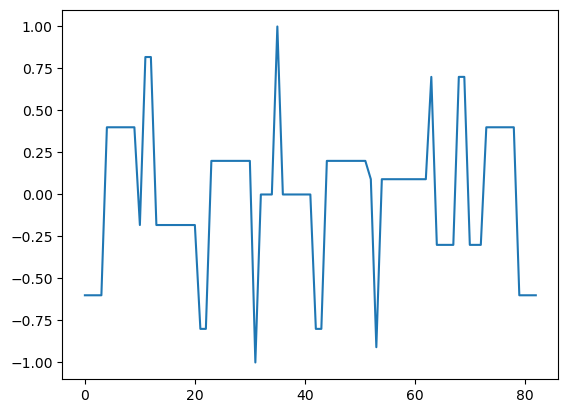

In [26]:
plt.plot(full_plot)

In [44]:
R = np.max(full_plot) - np.min(full_plot)

In [46]:
S = np.array(full_plot).std()

In [48]:
R

2.0

In [50]:
S

0.4200610188815307

In [54]:
# –í—ã—á–∏—Å–ª—è–µ–º R/S
RS = R / S

# –ü–∞—Ä–∞–º–µ—Ç—Ä –•–µ—Ä—Å—Ç–∞ –ø–æ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–º—É –º–∞—Å—à—Ç–∞–±—É
H = np.log(RS) / np.log(len(full_plot))

In [56]:
H

0.35314749145117746

In [34]:
Z = np.cumsum(full_plot)

In [36]:
R = np.max(Z) - np.min(Z)
S = np.std(Z)

In [38]:
R

4.800000000000008

In [40]:
S

0.9187624076063041

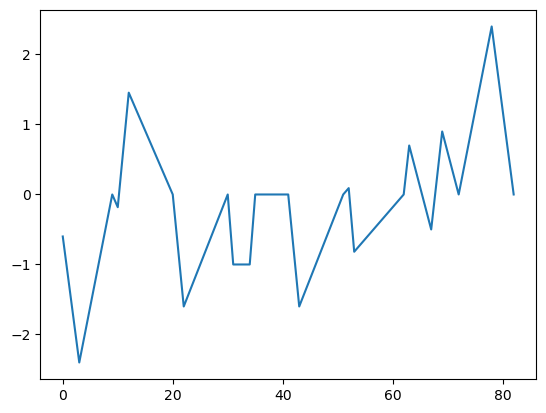

In [42]:
plt.plot(Z)

In [58]:
import math

In [62]:
len(Z)

83

In [ ]:
for i in len(Z):
    temp_ = Z[1: 

In [27]:
counter

8

In [8]:
df_half_year[df_half_year["identifier"] == 2539013067]

identifier _half_year  rating_numeric_cat                      _ro_type  \
633  2539013067    2017-H2                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
634  2539013067    2018-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
635  2539013067    2019-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
636  2539013067    2020-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
637  2539013067    2021-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
638  2539013067    2022-H1                   4  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
639  2539013067    2023-H1                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
641  2539013067    2024-H1                   3  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   

        agency  
633  Expert RA  
634  Expert RA  
635  Expert RA  
636  Expert RA  
637  Expert RA  
638  Expert RA  
639  Expert RA  
641  Expert RA

Check DFA

In [10]:
len(temp_)

1

In [68]:
check["identifier"].unique()

array([ 541016015, 1835047032, 3803202031, 3906098008, 5617000264,
       7727065444, 7735057951, 7750004305])

In [70]:
check.head(10)

identifier _half_year  rating_numeric_cat                      _ro_type  \
76   541016015    2017-H1                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
77   541016015    2017-H2                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
78   541016015    2018-H2                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
79   541016015    2019-H1                   5  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
80   541016015    2019-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
81   541016015    2020-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
82   541016015    2021-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
83   541016015    2022-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
84   541016015    2023-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   
85   541016015    2024-H2                   6  CBNK - –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏—è   

       agency  
76  Expert RA  
77  Expert RA  
78  Expert RA  
79  Expert RA  
80  Expert RA  
81  Expert RA  
82  Expert RA  
83  Expert RA  
84  Expert RA  
85  Expert RA

In [80]:
check["identifier", "half_year"

TypeError: _LocationIndexer.__call__() takes from 1 to 2 positional arguments but 4 were given

In [90]:
test_ = check[["identifier", "_half_year", "rating_numeric_cat"]]
df = pd.DataFrame(test_).set_index("identifier")  # –£–±–∏—Ä–∞–µ–º –≥–æ–¥ –∏–∑ –∏–Ω–¥–µ–∫—Å–æ–≤

# üîπ –°—á–∏—Ç–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
corr_matrix = df.corr(method="pearson")  # "pearson" = –ª–∏–Ω–µ–π–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è

# üîπ –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤ –∫–æ–º–ø–∞–Ω–∏–π")
plt.show()

ValueError: could not convert string to float: '2017-H1'